# Used Car Vehicle Prediction using machine learning

<p>This jupyter notebook represents the linear regression model for predicting the selling price of the used vehicle cars based on the below features

<ul>
<li>Year - Year in which car was bought</li>
<li>Present_Price - Current price of car</li>
<li>Kms_Driven - How many kms car has been driven till date</li>
<li>Fuel_Type - Fuel types for car e.g. Petrol, Diesel, CNG</li>
<li>Seller Type - Seller Type for car e.g. Dealer, individual</li>
<li>Transmission - Transimssion for car either manual or automatic</li>
<li>Owner - whether car has owner or not, 0 for no and 1 for yes</li>
</ul>
</p>

########################################################################################################################

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
df = pd.read_csv('car data.csv')

In [43]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [46]:
df_copy = df.copy()

## Data Preprocessing

<p>Though there are no null values, there are catgorical values such as fuel_type, seller_type, transmission that we will use in model building. <br> To convert this categorical variables in numerical varibles, we simply replace each value with unique numers </p> 

In [47]:
print("Transmission Unique Values - ", df['Transmission'].unique())
print("Seller_Type Unique Values - ", df['Seller_Type'].unique())
print("Fuel_Type Unique Values - ", df['Fuel_Type'].unique())

Transmission Unique Values -  ['Manual' 'Automatic']
Seller_Type Unique Values -  ['Dealer' 'Individual']
Fuel_Type Unique Values -  ['Petrol' 'Diesel' 'CNG']


In [48]:
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1 })
df['Transmission'] = df['Transmission'].replace({'Manual': 0, 'Automatic': 1 })


In [49]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


<p> Adding columns age that gives the how many years have been passed sicne car was first bought till 2021</p>

In [50]:
df['age'] = 2021 - df['Year']


In [51]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,7
1,sx4,2013,4.75,9.54,43000,1,0,0,0,8
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,4
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,10
4,swift,2014,4.60,6.87,42450,1,0,0,0,7
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0,3
6,ciaz,2015,6.75,8.12,18796,0,0,0,0,6
7,s cross,2015,6.50,8.61,33429,1,0,0,0,6
8,ciaz,2016,8.75,8.89,20273,1,0,0,0,5
9,ciaz,2015,7.45,8.92,42367,1,0,0,0,6


In [52]:
# rearranging columns

col_list = ['Car_Name', 'Year', 'age', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Selling_Price', 'Present_Price']
df = df[col_list]

## Visualization 

In [53]:
df.head(10)

,Car_Name,Year,age,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Present_Price
0,ritz,2014,7,27000,0,0,0,0,3.35,5.59
1,sx4,2013,8,43000,1,0,0,0,4.75,9.54
2,ciaz,2017,4,6900,0,0,0,0,7.25,9.85
3,wagon r,2011,10,5200,0,0,0,0,2.85,4.15
4,swift,2014,7,42450,1,0,0,0,4.60,6.87
5,vitara brezza,2018,3,2071,1,0,0,0,9.25,9.83
6,ciaz,2015,6,18796,0,0,0,0,6.75,8.12
7,s cross,2015,6,33429,1,0,0,0,6.50,8.61
8,ciaz,2016,5,20273,1,0,0,0,8.75,8.89
9,ciaz,2015,6,42367,1,0,0,0,7.45,8.92


### distribution_Plot

In [54]:
num_df = df.select_dtypes(['int', 'int64','float','float64'])
num_df

,Year,age,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Present_Price
0,2014,7,27000,0,0,0,0,3.35,5.59
1,2013,8,43000,1,0,0,0,4.75,9.54
2,2017,4,6900,0,0,0,0,7.25,9.85
3,2011,10,5200,0,0,0,0,2.85,4.15
4,2014,7,42450,1,0,0,0,4.60,6.87
...,...,...,...,...,...,...,...,...,...
296,2016,5,33988,1,0,0,0,9.50,11.60
297,2015,6,60000,0,0,0,0,4.00,5.90
298,2009,12,87934,0,0,0,0,3.35,11.00
299,2017,4,9000,1,0,0,0,11.50,12.50


In [55]:
num_df.drop('Year', axis=1, inplace=True)
num_df

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,age,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Present_Price
0,7,27000,0,0,0,0,3.35,5.59
1,8,43000,1,0,0,0,4.75,9.54
2,4,6900,0,0,0,0,7.25,9.85
3,10,5200,0,0,0,0,2.85,4.15
4,7,42450,1,0,0,0,4.60,6.87
...,...,...,...,...,...,...,...,...
296,5,33988,1,0,0,0,9.50,11.60
297,6,60000,0,0,0,0,4.00,5.90
298,12,87934,0,0,0,0,3.35,11.00
299,4,9000,1,0,0,0,11.50,12.50


In [56]:
num_col = df.columns
num_col.to_list()

['Car_Name',
 'Year',
 'age',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner',
 'Selling_Price',
 'Present_Price']

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

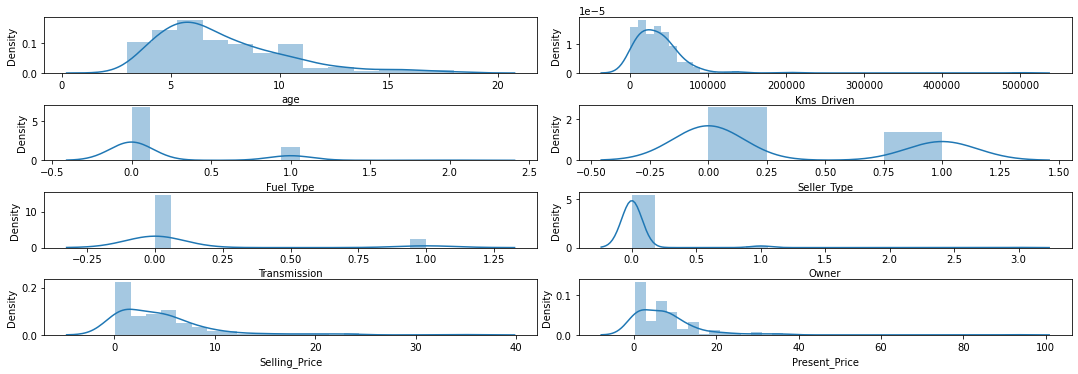

In [57]:
rows =4
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,5))
plt.tight_layout()
num_col = num_df.columns.to_list()
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(num_df[num_col[index]], ax=ax[i][j])
        index = index + 1

<p> <strong> Features are normally distributed </strong> </p>

### Average Selling Price car by car name

In [73]:
df_avg_sell_price_car_name = df.groupby('Car_Name').agg({"Selling_Price": 'mean'}).reset_index().sort_values('Selling_Price')

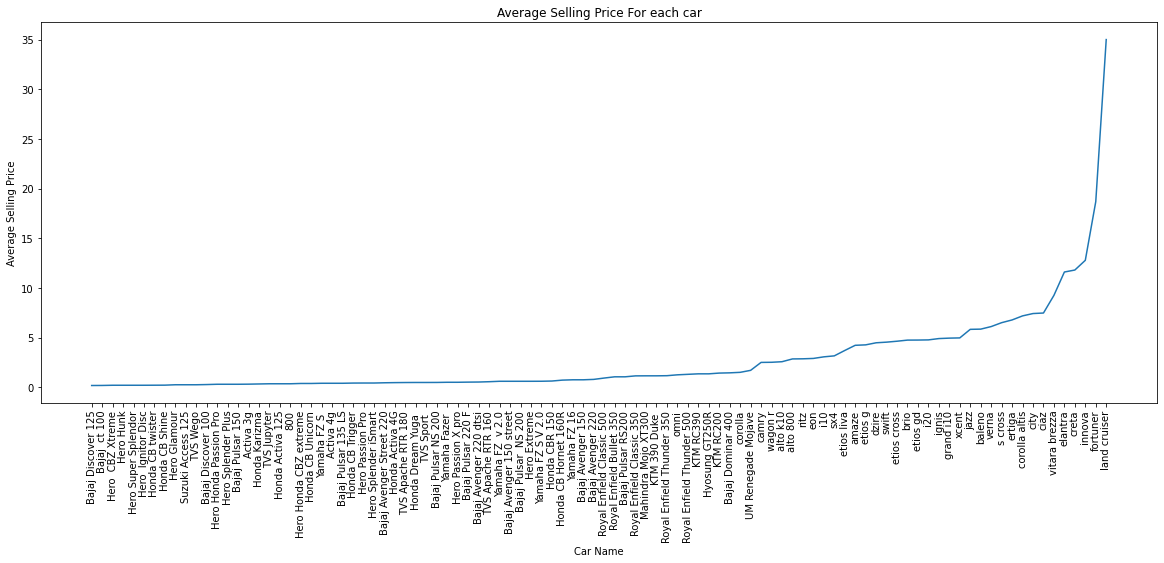

In [74]:
plt.figure(figsize=(20,7))
plt.plot(df_avg_sell_price_car_name['Car_Name'], df_avg_sell_price_car_name['Selling_Price'])
plt.xlabel("Car Name")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price For each car")
plt.xticks(rotation=90)
plt.show()

### Impact of Fuel Type on Selling price

In [67]:


df_gb_fuel = df_copy.groupby('Fuel_Type').agg({'Selling_Price': 'mean'}).reset_index()
df_gb_fuel


,Fuel_Type,Selling_Price
0,CNG,3.100000
1,Diesel,10.278500
2,Petrol,3.264184


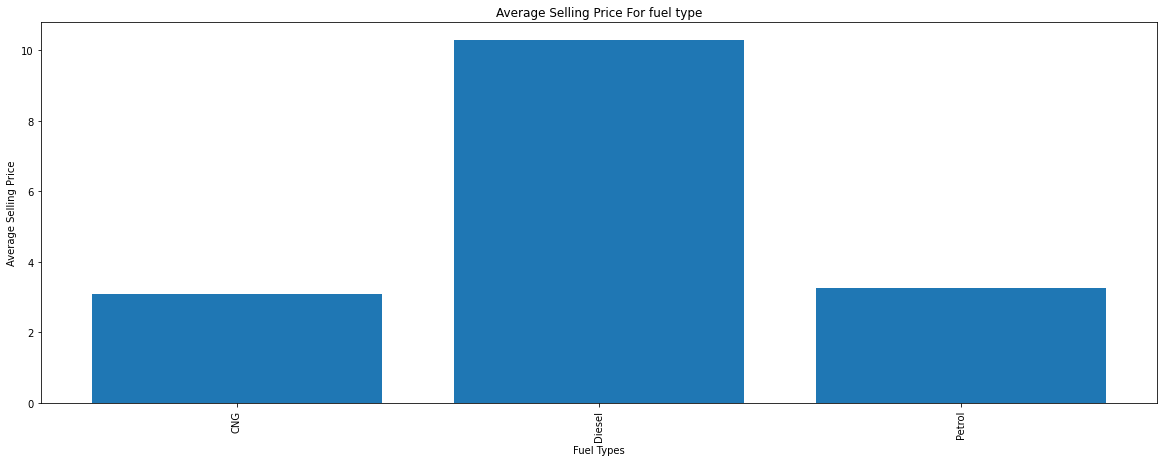

In [68]:
plt.figure(figsize=(20,7))
plt.bar(x= df_gb_fuel['Fuel_Type'], height = df_gb_fuel['Selling_Price'])
plt.xlabel("Fuel Types")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price For fuel type")
plt.xticks(rotation=90)
plt.show()

### Impact of seller type on selling price

In [69]:
df_gb_seller = df_copy.groupby('Seller_Type').agg({'Selling_Price': 'mean'}).reset_index()
df_gb_seller

,Seller_Type,Selling_Price
0,Dealer,6.721692
1,Individual,0.870943


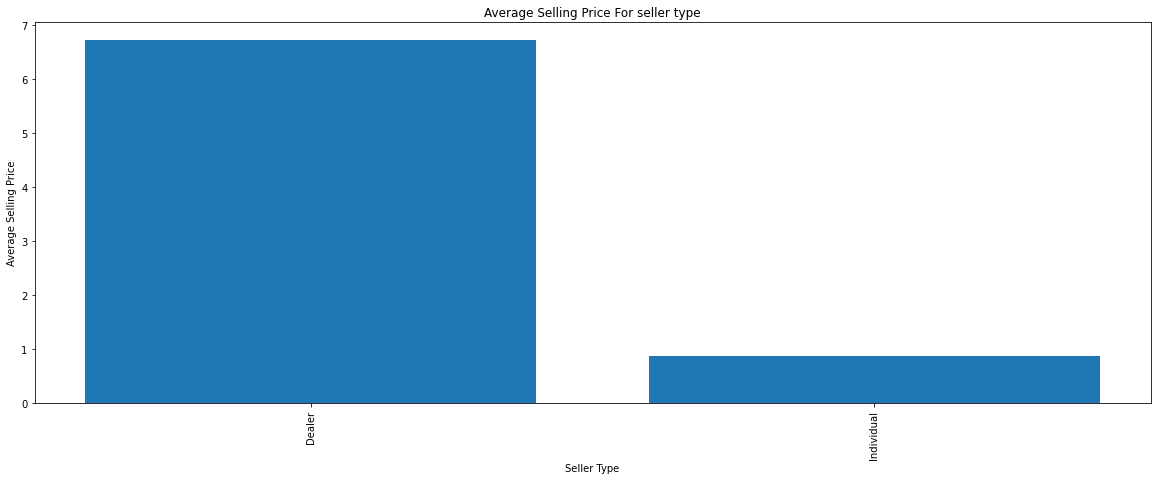

In [70]:
plt.figure(figsize=(20,7))
plt.bar(x= df_gb_seller['Seller_Type'], height = df_gb_seller['Selling_Price'])
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price For seller type")
plt.xticks(rotation=90)
plt.show()

### Pair plots to understand the relatipnship between each features

<Figure size 1080x360 with 0 Axes>

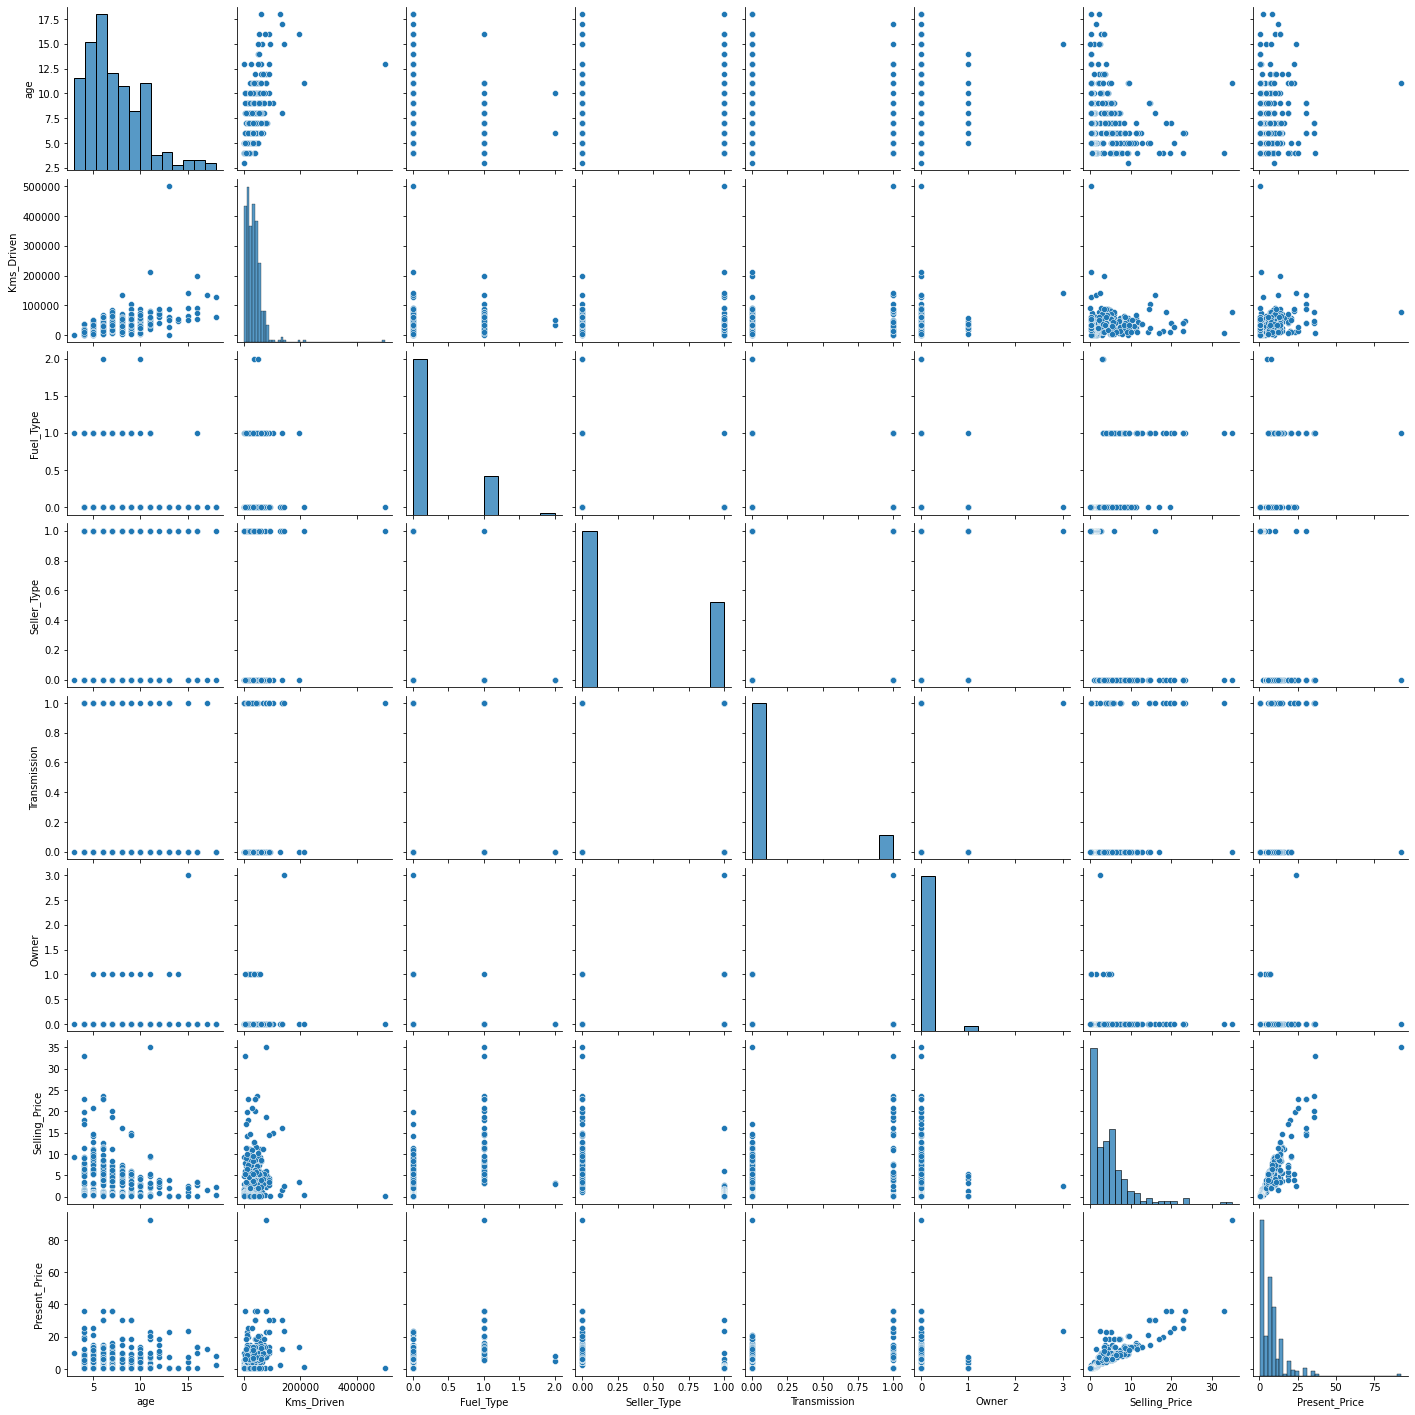

In [17]:
plt.figure(figsize=(15,5))
sns.pairplot(num_df)

### Correlation matrix

In [83]:
df_corr = df.corr()
df_corr

,Year,age,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Present_Price
Year,1.000000,-1.000000,-0.524342,0.053643,-0.039896,-0.000394,-0.182104,0.236141,-0.047584
age,-1.000000,1.000000,0.524342,-0.053643,0.039896,0.000394,0.182104,-0.236141,0.047584
Kms_Driven,-0.524342,0.524342,1.000000,0.166801,-0.101419,0.162510,0.089216,0.029187,0.203647
Fuel_Type,0.053643,-0.053643,0.166801,1.000000,-0.352415,0.080466,-0.055705,0.509467,0.440415
Seller_Type,-0.039896,0.039896,-0.101419,-0.352415,1.000000,-0.063240,0.124269,-0.550724,-0.512030
Transmission,-0.000394,0.000394,0.162510,0.080466,-0.063240,1.000000,0.050316,0.367128,0.348715
Owner,-0.182104,0.182104,0.089216,-0.055705,0.124269,0.050316,1.000000,-0.088344,0.008057
Selling_Price,0.236141,-0.236141,0.029187,0.509467,-0.550724,0.367128,-0.088344,1.000000,0.878983
Present_Price,-0.047584,0.047584,0.203647,0.440415,-0.512030,0.348715,0.008057,0.878983,1.000000


<AxesSubplot:>

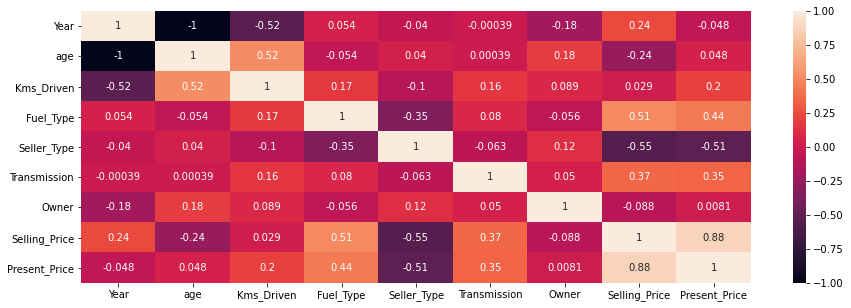

In [77]:
plt.figure(figsize=(15,5))
sns.heatmap(df_corr, annot=True)

# High Correlated values:

1. present_price
2. Fuel Type
3. Seller Type

## Linear Regression 

 ##  1.First create model using all features

In [20]:


df_all_x = df.drop(['Year', 'Car_Name', 'Selling_Price'], axis=1)
df_all_x

,age,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price
0,7,27000,0,0,0,0,5.59
1,8,43000,1,0,0,0,9.54
2,4,6900,0,0,0,0,9.85
3,10,5200,0,0,0,0,4.15
4,7,42450,1,0,0,0,6.87
...,...,...,...,...,...,...,...
296,5,33988,1,0,0,0,11.60
297,6,60000,0,0,0,0,5.90
298,12,87934,0,0,0,0,11.00
299,4,9000,1,0,0,0,12.50


In [21]:
df_y = df['Selling_Price']
df_y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [23]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(df_all_x,df_y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_Train, Y_Train)

LinearRegression()

In [24]:
predicted_values = lr.predict(X_Test)
predicted_values

array([10.39222503,  0.71269634,  4.26367425,  4.89542882,  9.84484784,
        4.22631808,  7.1173891 ,  7.37327394,  0.1592961 ,  5.16712598,
        6.20624893,  6.17414198,  2.11880837,  7.74045843,  1.92235986,
        1.71406658,  2.02899942,  1.8536463 ,  9.35171759,  4.2546458 ,
        1.48996098,  9.14496453,  1.45846216,  9.63402658,  0.82165042,
        8.07898502,  1.53763892, -3.19873666,  4.22373915,  2.09526116,
        3.42865389,  3.72427545,  5.58001877,  7.75879392, -1.91563192,
        6.80980082,  8.20694812,  5.81047156,  6.15629896,  6.27493028,
       16.02197751,  2.07455343,  1.04886513, -0.45830577,  6.82090538,
        6.78567581,  0.98725428,  6.83257783, 14.31925066,  3.01359825,
        8.04481951, -0.89441322,  8.99139759,  1.14814903,  2.1191082 ,
       -0.82919712,  0.68456956, 10.02743111, -0.46773344, -2.43254957,
       10.0831552 ])

In [90]:
## Calculating score

score_1 = metrics.r2_score(Y_Test, predicted_values)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_Test, predicted_values)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_Test, predicted_values)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.8401532365378387
Mean Absolute Error :  1.267199847291106
Mean squared error :  2.9358234289313745
Root Mean squared error :  1.7134244742419709


### success rate is 84%

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


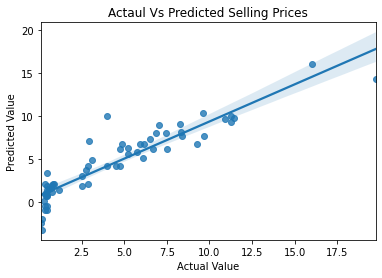

In [92]:
# scatter plot
sns.regplot(Y_Test, predicted_values)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actaul Vs Predicted Selling Prices")
plt.show()

## Building model with highly correlated values


In [102]:
high_corr_df = df.loc[:,['Fuel_Type', 'Seller_Type', 'Present_Price', 'Selling_Price']]

In [103]:
high_corr_df

,Fuel_Type,Seller_Type,Present_Price,Selling_Price
0,0,0,5.59,3.35
1,1,0,9.54,4.75
2,0,0,9.85,7.25
3,0,0,4.15,2.85
4,1,0,6.87,4.60
...,...,...,...,...
296,1,0,11.60,9.50
297,0,0,5.90,4.00
298,0,0,11.00,3.35
299,1,0,12.50,11.50


In [104]:
x_high_df = high_corr_df.drop('Selling_Price', axis=1)
y_df = high_corr_df['Selling_Price']

In [111]:
X_Test

,Fuel_Type,Seller_Type,Present_Price
99,1,0,20.450
161,0,1,0.826
89,0,0,6.760
30,1,0,5.980
232,0,0,14.790
...,...,...,...
172,0,1,0.640
94,0,0,22.780
160,0,1,0.950
199,0,1,0.580


In [107]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_high_df, y_df, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_Train, Y_Train)
high_predicted_values = lr.predict(X_Test)

In [109]:
## Calculating score

score_1 = metrics.r2_score(Y_Test, high_predicted_values)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_Test, high_predicted_values)

# Mean Squared Error
score_3 = metrics.mean_squared_error(Y_Test, high_predicted_values)

# Root Mean squared Error
score_4 = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print("Mean squared error : ", score_3)
print('Root Mean squared error : ', score_4)

R squared error :  0.7540635416901109
Mean Absolute Error :  1.2415687784451142
Mean squared error :  4.5169886502299645
Root Mean squared error :  2.1253208346576677


### success rate is 75%

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


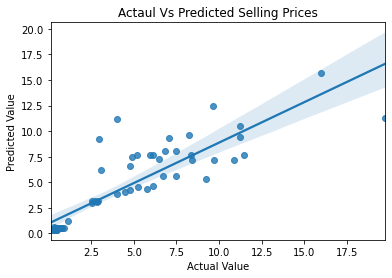

In [110]:
# scatter plot
sns.regplot(Y_Test, high_predicted_values)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actaul Vs Predicted Selling Prices")
plt.show()

## Conclusion 

<p> Model that includes all features has higher success rate than model with only highly correlated values in predicting selling price for car </p>